In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
import os

import pandas as pd
import plotnine as p

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
print(os.getcwd())
# os.chdir("Google Drive\Research Projects\Ongoing\linear-scvi")

C:\Users\vale\Google Drive\Research Projects\Ongoing\linear-scvi


In [3]:
ls pij_vae_results

 Volume in drive C is NVMe Drive
 Volume Serial Number is 9ACC-A435

 Directory of C:\Users\vale\Google Drive\Research Projects\Ongoing\linear-scvi\pij_vae_results

18/12/2019  23:00    <DIR>          .
18/12/2019  23:00    <DIR>          ..
09/11/2019  15:49             7,944 ldvae_1_history.csv
09/11/2019  15:56         6,311,495 ldvae_1_tsne.csv
09/11/2019  15:56           260,052 ldvae_1_W.csv
09/11/2019  15:49        29,058,210 ldvae_1_Z.csv
18/12/2019  23:04            15,995 ldvae_1_Z_covar.pdf
09/11/2019  16:51             7,946 ldvae_2_history.csv
09/11/2019  16:57         6,317,119 ldvae_2_tsne.csv
09/11/2019  16:57           235,473 ldvae_2_W.csv
09/11/2019  16:51        30,813,537 ldvae_2_Z.csv
18/12/2019  23:04            16,383 ldvae_2_Z_covar.pdf
09/11/2019  17:48             7,959 ldvae_3_history.csv
09/11/2019  17:54         6,315,573 ldvae_3_tsne.csv
09/11/2019  17:54           257,164 ldvae_3_W.csv
09/11/2019  17:48        29,327,148 ldvae_3_Z.csv
18/12/2019  23:04  

In [4]:
data = {}
for fname in glob('pij_vae_results/*_history.csv'):
    data[os.path.basename(fname).split('_hist')[0]] = pd.read_csv(fname)
    print(fname)

pij_vae_results\ldvae_1_history.csv
pij_vae_results\ldvae_2_history.csv
pij_vae_results\ldvae_3_history.csv
pij_vae_results\ldvae_4_history.csv
pij_vae_results\vae_history.csv


In [79]:
details = {
    'ldvae_1': 'LDVAE, normal, batch_norm',
    'ldvae_2': 'LDVAE, ln, batch_norm',
    'ldvae_3': 'LDVAE, normal, no batch_norm',
    'ldvae_4': 'LDVAE, ln, no batch_norm',
    'vae': 'VAE'
}

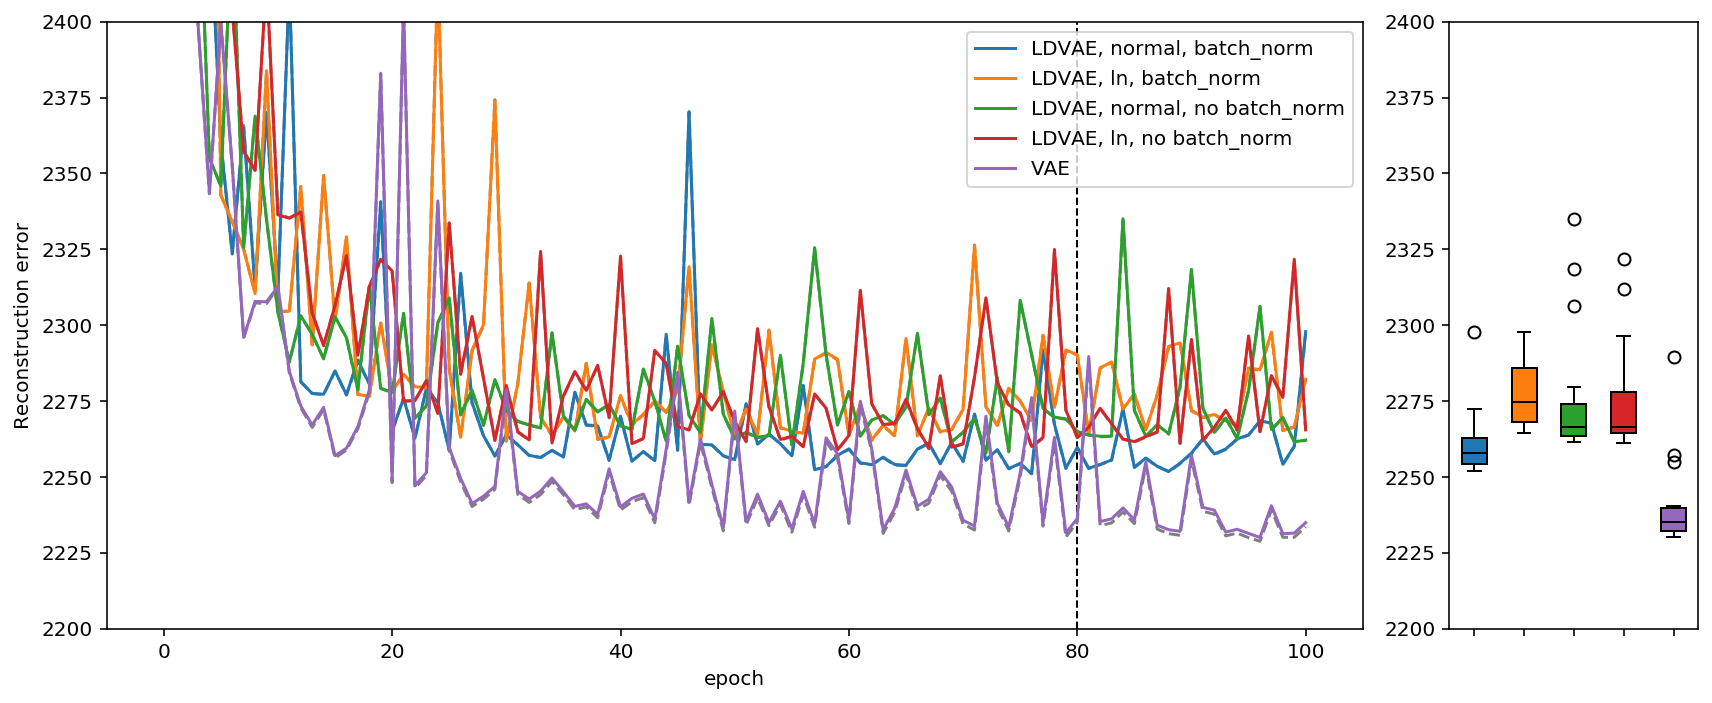

In [89]:
converged_epoch = 80

summaries = []
for i, model in enumerate(data):
    final_epochs = data[model]['reconstruction_error_test_set'].tail(100 - converged_epoch)
    summaries.append(final_epochs)

figsize(12, 5)

fig = plt.figure(constrained_layout=False)
gs = fig.add_gridspec(1, 5)

# Summary of converged iterations
ax_right = fig.add_subplot(gs[:, 4:])

bplot = ax_right.boxplot(summaries, patch_artist=True);

colors = [f'C{i}' for i in range(5)]
for patch, c in zip(bplot['boxes'], colors):
    patch.set_facecolor(c)
    
for patch in bplot['medians']:
    patch.set_color('k')
    
ax_right.set_ylim(bottom=2200, top=2400);
ax_right.set_xticklabels('')

# Error over epochs
ax_left = fig.add_subplot(gs[:, :4])
plt.axvline(converged_epoch, lw=1, ls='--', c='k')
for model in data:
    ax_left.plot(data[model]['reconstruction_error_train_set'], c='grey', linestyle='--')
    ax_left.plot(data[model]['reconstruction_error_test_set'], label=details[model])
    
ax_left.legend()
ax_left.set_ylim(bottom=2200, top=2400);
ax_left.set_xlabel('epoch')
ax_left.set_ylabel('Reconstruction error')

plt.tight_layout()
fig.savefig('figures/pij_model_comparison.pdf', bbox_inches='tight')

In [84]:
for model in data:
    avg = data[model]['reconstruction_error_test_set'].tail(100 - converged_epoch).mean()
    print(f'{model}\t{details[model].ljust(30)}{avg}')

ldvae_1	LDVAE, normal, batch_norm     2260.803853545518
ldvae_2	LDVAE, ln, batch_norm         2277.433340228086
ldvae_3	LDVAE, normal, no batch_norm  2275.184176325532
ldvae_4	LDVAE, ln, no batch_norm      2275.085001055953
vae	VAE                           2239.53480803394


In [87]:
for model in data:
    avg = data[model]['reconstruction_error_test_set'].tail(100 - converged_epoch).std()
    print(f'{model}\t{details[model].ljust(30)}{avg}')

ldvae_1	LDVAE, normal, batch_norm     10.481612782198505
ldvae_2	LDVAE, ln, batch_norm         10.749731373918674
ldvae_3	LDVAE, normal, no batch_norm  20.489904806252166
ldvae_4	LDVAE, ln, no batch_norm      17.678935010008992
vae	VAE                           13.871185666365102
